<a href="https://colab.research.google.com/github/samriddhi448/TheSparksFoundation/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```

Author: Samriddhi Jain
GRIP: The Sparks Foundation
Role: Data Science & Business Analytics Intern
Duration: July 2021 - August 2021
TASK 2: Predict Using Unsupervised ML
```



# **TASK-2** ***Prediction Using UnSupervised Learning***
##**Dataset- https://bit.ly/3kXTdox**


##**From the given ‘Iris’ dataset, predict the optimum number of clusters**
##**and represent it visually.**

##**IMPORTING THE REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans  


##**READING THE DATA FILE AND PRINTING THE STATUS**

In [ ]:
DATA =pd.read_csv('Iris.csv')
print("Data imported successfully")

Data imported successfully


##**CHECKING THE NUMBER OF COLUMNS IN THE DATA SET**

In [ ]:
DATA.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##**PRINTING NUMBER OF ROWS AND COLUMNS**



In [ ]:
DATA.shape

(150, 6)

In [ ]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


##**CHECK THE DISTRIBUTION OF THE TARGET CLASS IN THE GIVEN SET**

In [ ]:
DATA.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

##**VISUALIZATION OF IRIS SPECIES AND UNDERSTAND SEPAL AND PETAL**

In [ ]:
from IPython.display import Image
Image(url='https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png', width=600)

##**SUMMARY OF THE DATASET**

In [ ]:
DATA.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



##**VISUAL REPRESENTSTION OF RELATION BETWEEN EACH TYPE OF COLUMN VARIABLE**

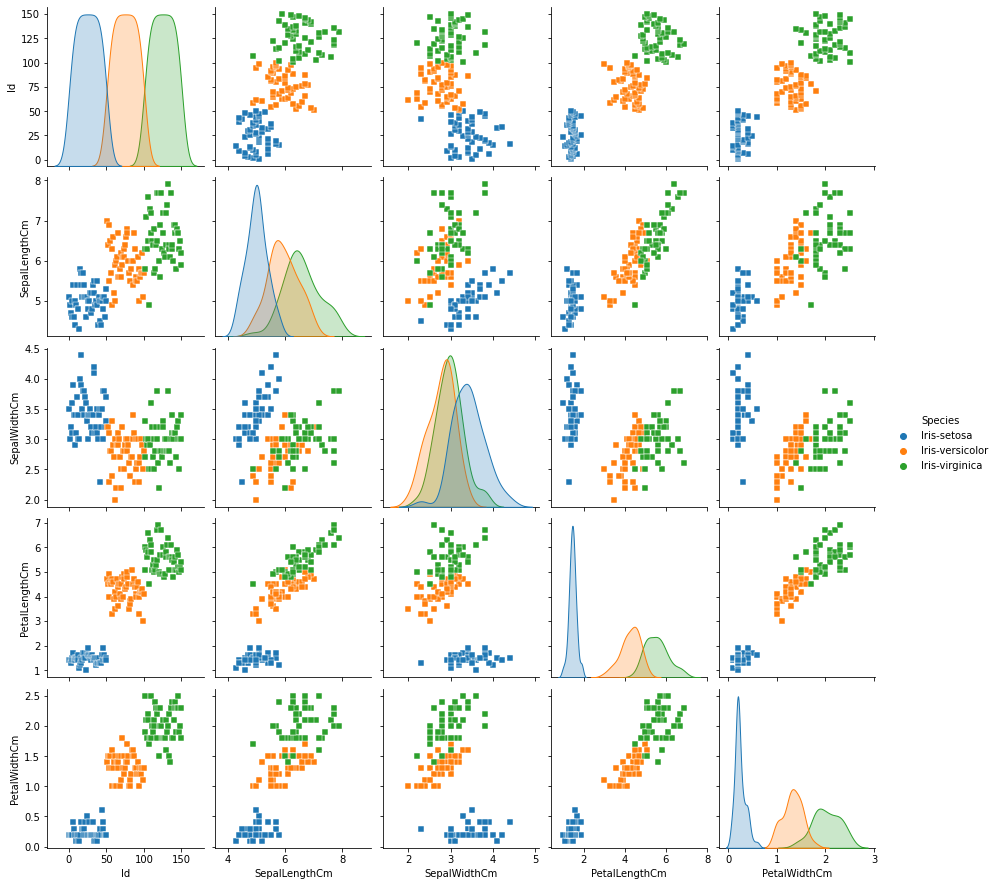

In [ ]:
sns.pairplot(DATA, hue='Species', markers='s')
plt.show()

##**DROPING UNNECESSARY COLUMNS**

In [ ]:
DATA.drop("Id",inplace=True,axis=1)
DATA.drop("Species",inplace=True,axis=1)

##**HEATMAP TO SHOW THE CORELATION BETWEEN EACH COLUMN**

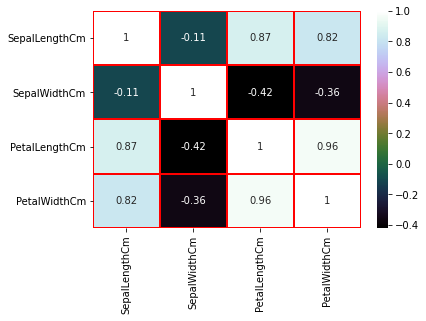

In [ ]:
sns.heatmap(DATA.corr(), linecolor = 'RED',linewidth=1, annot=True,cmap="cubehelix")

##**CALCULATING WITHIN-CLUSTER SUM OF SQUARE VALUE**

In [ ]:
within_cluster_sum_of_square = []
x = DATA.iloc[:, [0, 1, 2, 3]].values

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(DATA)
    within_cluster_sum_of_square.append(km.inertia_)

##**PLOTTING "WITHIN-CLUSTER SUM OF SQUARE VALUE" AGAINST CLUSTER RANGE USING ELBOW METHOD**

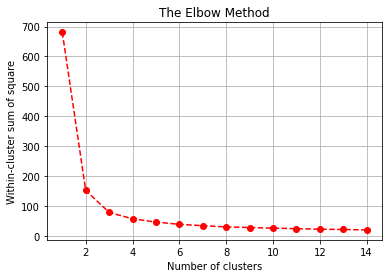

In [ ]:
plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

##**APPLYING K-MEANS CLUSTERING ON THE DATA**

In [ ]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(DATA)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

##**VISUALIZATION OF THE CLUSTER ALONG THE CENTROID**

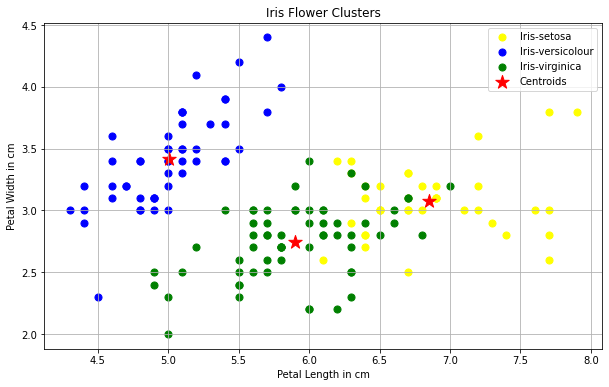

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 50, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 200, c = 'red', marker = '*', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()
plt.grid()
plt.show()

##**I conclude that Here, I have successfully predicted the optimum no of clusters and represented them visually.**